#### **1) Libraries**

In [10]:
# Don't forget to restart
# !pip install -U tensorflow_probability -q
!pip install ipdb -q
# !pip install ipdb tensorflow==2.5.0 -q
# !pip install git+https://github.com/tensorflow/docs -q
# !pip install -U -i https://test.pypi.org/simple/ nsc -q

In [11]:
from IPython import display

import ipdb
import math
import glob
import imageio
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()

import numpy as np
import pandas as pd
import PIL
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
import time
from datetime import datetime
import os
import random
from tqdm import tqdm
from collections import defaultdict

from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
from tensorflow.keras.layers import Input, InputLayer, Lambda, Reshape, Dropout, \
                                    Flatten, Dense, Conv2D, Conv2DTranspose

In [12]:
pip list | grep tensorflow

tensorflow                    2.6.0
tensorflow-datasets           4.0.1
tensorflow-estimator          2.6.0
tensorflow-gcs-config         2.6.0
tensorflow-hub                0.12.0
tensorflow-metadata           1.2.0
tensorflow-probability        0.13.0


In [13]:
if tf.test.gpu_device_name() != '/device:GPU:0':
    print('WARNING: GPU device not found.')
else:
    print('SUCCESS: Found GPU: {}'.format(tf.test.gpu_device_name()))

SUCCESS: Found GPU: /device:GPU:0


In [14]:
# List all physical devices
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

If using Google Colab, save in your Google Drive.

In [49]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#### **2) Extract Metrics**

In [62]:
version = 'v4.3_beta'
seed = 377295
base_path = f'gdrive/My Drive/Colab Notebooks/coupled_vae/vae/output/{version}/seed{seed}/'
base_path

'gdrive/My Drive/Colab Notebooks/coupled_vae/vae/output/v4.3_beta/seed377295/'

In [68]:
metrics_col = ['image', 'beta', 'p_std', 'epoch',
               'neg_elbo', 'recon_loss', 'kl_div',
               'elbo_decisiveness', 'elbo_accuracy', 'elbo_robustness',
               'recon_decisiveness', 'recon_accuracy', 'recon_robustness',
               'kldiv_accuracy', 'kldiv_decisiveness', 'kldiv_robustness'
               ]

In [69]:
metrics_df = pd.DataFrame(columns=metrics_col)
metrics_df

,image,beta,p_std,epoch,neg_elbo,recon_loss,kl_div,elbo_decisiveness,elbo_accuracy,elbo_robustness,recon_decisiveness,recon_accuracy,recon_robustness,kldiv_accuracy,kldiv_decisiveness,kldiv_robustness


In [70]:
beta_list = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 3, 4]
p_std_list = beta_list
images = ['identity']
# images = ['identity', 'motion_blur', 'translate', 'rotate']

In [71]:
%%time
for beta in beta_list:
    for image in images:
        dir_path = f'{base_path}beta{beta}/{image}/metrics/'
        input_df = pd.read_csv(f'{dir_path}table.csv')
        input_df['image'] = image
        input_df['beta'] = beta
        input_df['p_std'] = 1
        input_df.dropna(axis=1, inplace=True)
        metrics_df = metrics_df.append(input_df)

for p_std in p_std_list:
    for image in images:
        dir_path = f'{base_path}p_std{p_std}/{image}/metrics/'
        input_df = pd.read_csv(f'{dir_path}table.csv')
        input_df['image'] = image
        input_df['beta'] = 1
        input_df['p_std'] = p_std
        input_df.dropna(axis=1, inplace=True)
        metrics_df = metrics_df.append(input_df)

metrics_df.drop_duplicates(subset=['image', 'beta', 'p_std', 'epoch'], inplace=True)

CPU times: user 156 ms, sys: 9.09 ms, total: 165 ms
Wall time: 199 ms


In [72]:
metrics_df.shape

(950, 16)

In [73]:
metrics_df.head()

,image,beta,p_std,epoch,neg_elbo,recon_loss,kl_div,elbo_decisiveness,elbo_accuracy,elbo_robustness,recon_decisiveness,recon_accuracy,recon_robustness,kldiv_accuracy,kldiv_decisiveness,kldiv_robustness
0,identity,0.25,1,1.0,185.062195,182.766663,9.182101,2.133231e-40,4.342211e-84,2.344321e-138,8.876182e-35,4.221308e-80,4.447067e-134,0.000103,0.000167,4.957852e-05
1,identity,0.25,1,2.0,168.187622,165.424500,11.052506,1.183048e-28,2.275128e-77,3.953406e-142,1.003851e-20,1.435650e-72,3.205243e-137,0.000016,0.000031,1.787402e-06
2,identity,0.25,1,3.0,162.461868,159.685760,11.104439,8.992637e-27,6.710613e-75,4.110693e-163,3.931475e-19,4.460240e-70,1.806171e-158,0.000015,0.000037,1.484592e-06
3,identity,0.25,1,4.0,157.055756,154.111542,11.776856,4.186639e-26,9.027996e-73,7.916948e-160,1.222939e-18,1.175479e-67,7.112126e-155,0.000008,0.000021,1.032302e-06
4,identity,0.25,1,5.0,154.655136,151.596573,12.234230,1.077889e-25,7.066235e-72,7.168764e-151,7.077504e-18,1.453607e-66,1.373816e-145,0.000005,0.000014,7.159843e-07


In [74]:
metrics_df['image'].unique()

array(['identity'], dtype=object)

In [19]:
metrics_df.columns

Index(['epoch', 'neg_elbo', 'recon_loss', 'kl_div', 'elbo_decisiveness',
       'elbo_accuracy', 'elbo_robustness', 'recon_decisiveness',
       'recon_accuracy', 'recon_robustness', 'kl_decisiveness', 'kl_accuracy',
       'kl_robustness', 'kldiv_accuracy', 'kldiv_decisiveness',
       'kldiv_robustness'],
      dtype='object')

#### **3) Extract Images**

(-0.5, 287.5, 287.5, -0.5)

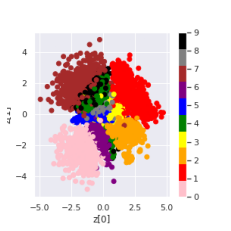

In [20]:
# Read Images
img = mpimg.imread(save_path + 'latent_spaces/latent_cdX_clX_epoch50.png')
image_size = 4

# Output Images
fig, ax = plt.subplots()
ax.imshow(img)
ax.axis('off')  # clear x-axis and y-axis


# plt.imshow(img)
# # plt.figure(figsize=(image_size, image_size))
# plt.axis('off')
# plt.show();

#### **3) Show Results**

#### **4) GIFS**